In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print(df.shape)

## check missing values

print(df.isnull().sum())

print(df[df.Embarked.isnull()])


(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [3]:

"""- Survived: 0 = No, 1 = Yes

- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

- sibsp: siblings / spouses aboard the Titanic

- parch: parents / children aboard the Titanic

- ticket: Ticket number

- cabin: Cabin number

- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
"""
# death and survived count

print(df.Survived.value_counts()) #display no of counts for each unique value


0    549
1    342
Name: Survived, dtype: int64


In [4]:
"""## plot relationship between survived feature and other feature"""

#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print(df.Fare.agg(['min','max','mean','median']))

print(df.sort_values('Fare',ascending=False)[:10])

a=[5,7,8,6,90]  #90 is a outlier
print(np.mean(a))

print(np.median(a))


min         0.000000
max       512.329200
mean       32.204208
median     14.454200
Name: Fare, dtype: float64
     PassengerId  Survived  Pclass                                   Name  \
258          259         1       1                       Ward, Miss. Anna   
737          738         1       1                 Lesurer, Mr. Gustave J   
679          680         1       1     Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1             Fortune, Miss. Mabel Helen   
27            28         0       1         Fortune, Mr. Charles Alexander   
341          342         1       1         Fortune, Miss. Alice Elizabeth   
438          439         0       1                      Fortune, Mr. Mark   
311          312         1       1             Ryerson, Miss. Emily Borie   
742          743         1       1  Ryerson, Miss. Susan Parker "Suzette"   
118          119         0       1               Baxter, Mr. Quigg Edmond   

        Sex   Age  SibSp  Parch    Ticket

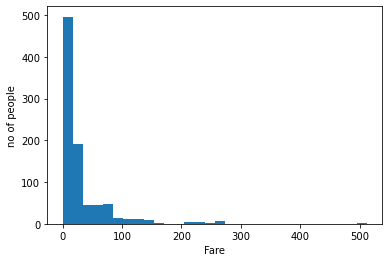

In [5]:
plt.hist(df.Fare,bins=30)
plt.xlabel('Fare')
plt.ylabel('no of people')
plt.show()


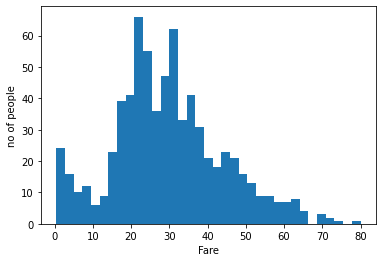

In [6]:
#f[(df.Fare>30) & (df.Fare<60)]

df.Age.agg(['min','max','mean','median'])

plt.hist(df.Age,bins=35)
plt.xlabel('Fare')
plt.ylabel('no of people')
plt.show()


female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64


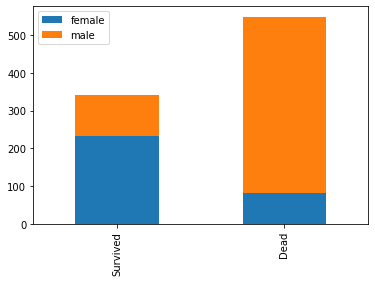

In [7]:
survived=df[df['Survived']==1].Sex.value_counts()
print(survived)

dead=df[df['Survived']==0].Sex.value_counts()
print(dead)

survived=df[df['Survived']==1].Sex.value_counts()

dead=df[df['Survived']==0].Sex.value_counts()

df_new = pd.DataFrame([survived,dead])
df_new.index = ['Survived','Dead']
df_new.plot(kind='bar',stacked=True)
plt.show()

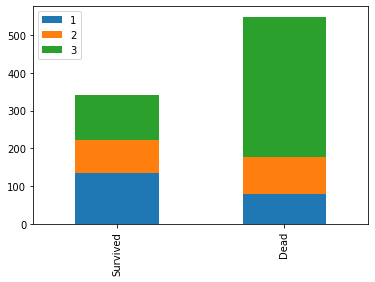

In [8]:
survived=df[df['Survived']==1].Pclass.value_counts()
dead=df[df['Survived']==0].Pclass.value_counts()
df_new = pd.DataFrame([survived,dead])
df_new.index = ['Survived','Dead']
df_new.plot(kind='bar',stacked=True)
plt.show()


In [9]:
"""#### 1st class more likely survivied than other classes

#### 3rd class more likely dead than other classes
"""

print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
# to show specified rows column
df_1 = df.loc[:,['Pclass','Sex','Age','Fare']]

print(df_1)

"""### label encoding
### one hot encoding
"""


print(df_1.head())


     Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]
   Pclass     Sex   Age     Fare
0       3    male  22.0   7.2500
1       1  female  38.0  71.2833
2       3  female  26.0   7.9250
3       1  female  35.0  53.1000
4       3    male  35.0   8.0500


In [11]:
#df_1.Sex=df_1.Sex.map({"male": 0, "female": 1})  #label encod

#pd.get_dummies(df_1['Sex'])

c1=pd.get_dummies(df_1['Sex'])  #one hot encoding
print(c1.head())

print(df.dtypes)

c2 = df_1.select_dtypes(exclude=['object'])  #int ,float
print(c2.head())

final_data = pd.concat([c2,c1],axis=1)
print(final_data.head())

   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   Pclass   Age     Fare
0       3  22.0   7.2500
1       1  38.0  71.2833
2       3  26.0   7.9250
3       1  35.0  53.1000
4       3  35.0   8.0500
   Pclass   Age     Fare  female  male
0       3  22.0   7.2500       0     1
1       1  38.0  71.2833       1     0
2       3  26.0   7.9250       1     0
3       1  35.0  53.1000       1     0
4       3  35.0   8.0500       0     1


In [12]:
#df_1.head()
print(final_data.head())

print(final_data.isnull().sum())

print(final_data.Age.median())

final_data.Age = final_data.Age.fillna(final_data.Age.median())

print(final_data.isnull().sum())

X = final_data.values

y = df.Survived.values

print(X.shape)

print(y.shape)

print(X.min())


   Pclass   Age     Fare  female  male
0       3  22.0   7.2500       0     1
1       1  38.0  71.2833       1     0
2       3  26.0   7.9250       1     0
3       1  35.0  53.1000       1     0
4       3  35.0   8.0500       0     1
Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64
28.0
Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64
(891, 5)
(891,)
0.0


In [13]:
#y

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.25,random_state=12)

std = StandardScaler()

Xtrain_std = std.fit_transform(xtrain)
Xtest_std = std.transform(xtest)

# from sklearn.svm import SVC

# log = SVC()
# from sklearn.ensemble import RandomForestClassifier
# log = RandomForestClassifier()
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
print(log.fit(Xtrain_std,ytrain))

pred = log.predict(Xtest_std)

from sklearn.metrics import accuracy_score



LogisticRegression()


In [14]:
print(accuracy_score(ytest,pred))

0.7802690582959642
